<a href="https://colab.research.google.com/github/brunatoloti/quarentena-dados/blob/master/exercicios/aula_e_desafio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Aula 3 - Correlações e Exploração dos Dados

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importando uma base do IMDB

In [ ]:
imdb = pd.read_csv('drive/My Drive/Estudos Python/QuarentenaDados - Alura/dados/movie_metadata.csv')
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Quais os valores presentes na coluna 'color' do dataframe imdb? Podemos intuir o que essa coluna representa analisando os possíveis valores presentes nela!

In [ ]:
imdb['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

Se fizermos o value_counts() da coluna color, obtemos a quantidade de filmes que são coloridos e que são preto e branco. Mas qual a quantidade de filmes que não possuíam essa coluna cadastrada (os valores nan)? É desconsiderado! Sabemos que essa base de dados possui 5043 filmes (pelo número de linhas do dataframe), onde 4815 são coloridos e 209 são preto e branco. Portanto, 19 filmes não possuem "cor" cadastrada.

In [ ]:
imdb['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

Fazendo value_counts(normalize=True), conseguimos que, aproximadamente, 96% dos filmes que possuem "cor" cadastrada, são coloridos e que, aproximadamente, 4% são preto e branco.

In [ ]:
imdb['color'].value_counts(normalize=True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

Quantos filmes cada diretor fez nessa lista de filmes?

In [ ]:
imdb['director_name'].value_counts()

Steven Spielberg    26
Woody Allen         22
Clint Eastwood      20
Martin Scorsese     20
Ridley Scott        17
                    ..
Ruggero Deodato      1
Jamal Hill           1
Ted Demme            1
Sam Martin           1
Jaime Zevallos       1
Name: director_name, Length: 2398, dtype: int64

Estatística descritiva da coluna num_critic_for_reviews, que nos fornece a quantidade de críticas de cada filme. E a distribuição dessas quantidades.

In [ ]:
imdb['num_critic_for_reviews'].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

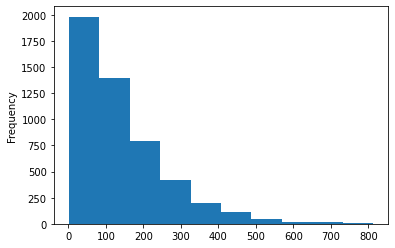

In [ ]:
imdb['num_critic_for_reviews'].plot(kind='hist')

Qual a distribuição do faturamento dos filmes?

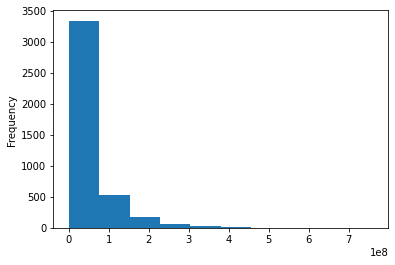

In [ ]:
imdb['gross'].plot(kind='hist')

Quais os cinco filmes que mais faturaram?

In [ ]:
imdb.sort_values('gross', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000


O filme Avengers veio duas vezes! Pode ser erro ou não! Conseguimos fazer um drop duplicates, se quisermos.

In [ ]:
imdb_drop = imdb.drop_duplicates()

In [ ]:
imdb_drop.sort_values('gross', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,57802,Morgan Freeman,0.0,based on comic book|dc comics|psychopath|star ...,http://www.imdb.com/title/tt0468569/?ref_=fn_t...,4667.0,English,USA,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000


Note que o quinto filme mais rentável mudou, dado que excluimos as linhas duplicadas do dataframe imdb.

Podemos pegar 10 filmes aleatórios, por exemplo, de nosso dataframe imdb.

In [ ]:
imdb.sort_values('gross', ascending=False).sample(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1784,Color,Jay Roach,74.0,119.0,116.0,385.0,Mary McCormack,738.0,8888143.0,Comedy|Drama|Sport,Scott Grimes,"Mystery, Alaska",22250,2171,Ron Eldard,0.0,alaska|male nudity|nudity|sex|small town,http://www.imdb.com/title/tt0134618/?ref_=fn_t...,123.0,English,Canada,R,28000000.0,1999.0,428.0,6.7,2.35,913
2141,Color,Jeff Wadlow,140.0,110.0,65.0,149.0,Neil Brown Jr.,3000.0,24848292.0,Action|Drama|Sport,Djimon Hounsou,Never Back Down,80556,4089,Leslie Hope,1.0,club|fight|fighting|high school|mixed martial ...,http://www.imdb.com/title/tt1023111/?ref_=fn_t...,184.0,English,USA,PG-13,20000000.0,2008.0,427.0,6.6,2.35,0
4691,Color,Michael Cuesta,64.0,97.0,52.0,36.0,Bruce Altman,80.0,1141829.0,Crime|Drama,Adam LeFevre,L.I.E.,8509,209,Walter Masterson,1.0,ephebophile|pederasty|pedophilia|playing hooky...,http://www.imdb.com/title/tt0242587/?ref_=fn_t...,109.0,English,USA,NC-17,700000.0,2001.0,67.0,7.2,1.85,420
3355,Color,Quentin Tarantino,215.0,178.0,16000.0,857.0,Eric Stoltz,13000.0,107930000.0,Crime|Drama,Bruce Willis,Pulp Fiction,1324680,16557,Phil LaMarr,1.0,black comedy|cunnilingus|neo noir|nonlinear ti...,http://www.imdb.com/title/tt0110912/?ref_=fn_t...,2195.0,English,USA,R,8000000.0,1994.0,902.0,8.9,2.35,45000
1303,Color,William Malone,104.0,101.0,37.0,595.0,Jeffrey Combs,2000.0,13208023.0,Crime|Horror|Thriller,Natascha McElhone,Feardotcom,17309,4262,Udo Kier,1.0,bondage gear|bound and gagged|hung by one's wr...,http://www.imdb.com/title/tt0295254/?ref_=fn_t...,388.0,English,UK,R,42000000.0,2002.0,886.0,3.3,2.35,612
3849,Color,Darren Aronofsky,234.0,102.0,0.0,167.0,Mark Margolis,1000.0,3609278.0,Drama,Ellen Burstyn,Requiem for a Dream,573541,2235,Louise Lasser,0.0,addiction|diet pill|drug addiction|fast motion...,http://www.imdb.com/title/tt0180093/?ref_=fn_t...,1916.0,English,USA,R,4500000.0,2000.0,1000.0,8.4,1.37,38000
3764,Color,Nicholaus Goossen,61.0,90.0,4.0,556.0,Joel David Moore,2000.0,6088249.0,Comedy,Linda Cardellini,Grandma's Boy,67853,5202,Shirley Jones,0.0,co worker|game tester|loss of virginity|roomma...,http://www.imdb.com/title/tt0456554/?ref_=fn_t...,202.0,English,USA,R,NaN,2006.0,936.0,7.0,2.35,0
3932,Color,Ruggero Deodato,15.0,87.0,101.0,324.0,Eva LaRue,721.0,800000.0,Adventure|Fantasy,Michael Berryman,The Barbarians,2308,1700,Richard Lynch,0.0,bare breasts|comic relief|dragon|gladiator|harem,http://www.imdb.com/title/tt0092615/?ref_=fn_t...,35.0,English,USA,R,4000000.0,1987.0,576.0,4.8,1.85,550
2694,Black and White,Irwin Winkler,119.0,125.0,34.0,65.0,Keith Allen,427.0,13337299.0,Biography|Drama|Music|Musical,Kevin McNally,De-Lovely,9649,729,Sandra Nelson,7.0,cole porter|composer|love|party|tears,http://www.imdb.com/title/tt0352277/?ref_=fn_t...,226.0,English,USA,PG-13,20000000.0,2004.0,66.0,6.6,2.35,1000
4910,Color,Livingston Oden,1.0,89.0,0.0,15.0,Victoria Lachelle,138.0,NaN,Comedy|Horror|Mystery|Thriller,Susan Chambers,Solitude,78,192,Ali Daniels,0.0,NaN,http://www.imdb.com/title/tt3565836/?ref_=fn_t...,1.0,English,USA,NaN,NaN,2014.0,18.0,6.8,NaN,267


Filmes coloridos faturam mais que filmes em preto e branco?


Precisamos transformar algo em binário, para ter a noção de maior e menor. Lembrando que a coluna cor possui essa característica, ou seja, ou é Colorido ou não, podemos criar uma coluna que recebe 0 ou 1 de acordo com a coluna color.
Assim, além de continuarmos com essa noção de colorido ou não, temos a grandeza de maior e menor.

In [ ]:
color_or_blackwhite = imdb.query("color in [' Black and White','Color']")
len(color_or_blackwhite)

5024

In [ ]:
#A coluna color_c_or_bw recebe 1 se estiver Color na coluna color e 0 se não estiver
color_or_blackwhite['color_c_or_bw'] = (color_or_blackwhite['color'] == 'Color')*1 
color_or_blackwhite.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_c_or_bw
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


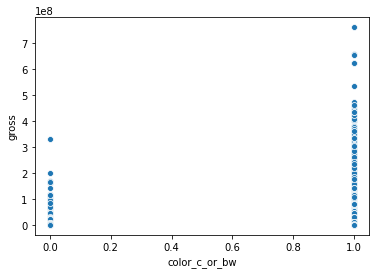

In [ ]:
sns.scatterplot(data=color_or_blackwhite, x='color_c_or_bw', y='gross')

In [ ]:
#Média de faturamento de filmes coloridos e filmes em preto e branco
color_or_blackwhite.groupby('color').mean()['gross']

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

Vemos pelo gráfico e por outras medidas que os filmes coloridos faturam mais que os filmes em preto e branco. Mas tudo isso tem motivo, não é porque os filmes coloridos são melhores que os filmes em preto e branco, nem nada do tipo! Uma das explicações é que na época em que os filmes em preto e branco foram lançados, não havia cinema e nem todo mundo conseguia assistir. 

Filmes coloridos possuem média de notas mais alta que filmes em preto e branco?

In [ ]:
color_or_blackwhite.groupby('color').mean()['imdb_score']

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

In [ ]:
color_or_blackwhite.groupby('color').median()['imdb_score']

color
 Black and White    7.4
Color               6.5
Name: imdb_score, dtype: float64

Não necessariamente o fato de os filmes em preto e branco terem uma média maior e uma mediana maior significa que eles são melhores. Há alguns outros fatores que podemos/devemos levar em consideração na hora de analisar se um filme é melhor que outro nessas condições.

Filmes coloridos possuem um orçamento e um faturamento maior? Sim, não ou não podemos ter essa correlação?

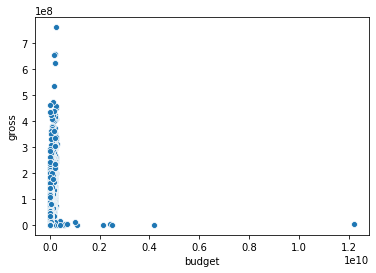

In [ ]:
budget_gross = imdb.query('budget > 0 | gross > 0')[['budget', 'gross']].dropna() #pegando apenas as colunas de orçamento e faturamento e tirando os valores na
                                                                                #e pegando os filmes que possuem budget>0 ou gross>0
sns.scatterplot(x='budget', y='gross', data=budget_gross)

Pegando apenas os filmes que são americanos para que possamos comparar os filmes que possuem a mesma moeda

In [ ]:
imdb["country"].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

USA representa que o filme é americano. Portanto, usaremos 'USA' em nossa query.

In [ ]:
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


Podemos ter alguns filmes duplicados (Lembrando que eu havia retirado os duplicados e colocado o dataframe sem os duplicados em imdb_drop. Porém, estou usando aqui o dataframe imdb que possui os duplicados).

In [ ]:
imdb_usa = imdb_usa.drop_duplicates()
imdb_usa.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


Text(0.5, 1.0, 'Faturmento X Orçamento - Filmes Americanos')

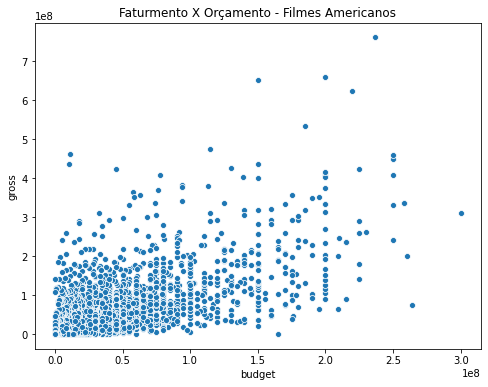

In [ ]:
budget_gross_usa = imdb_usa.query("budget > 0 | gross > 0")[['budget', 'gross']].dropna() #pegando apenas as colunas de orçamento e faturamento e tirando os valores na
                                                                                #e pegando os filmes que possuem budget>0 ou gross>0
plt.figure(figsize=(8,6))
sns.scatterplot(x='budget', y='gross', data=budget_gross_usa).set_title('Faturmento X Orçamento - Filmes Americanos')

Vemos, acima, um pouco do relacionamento entre duas variáveis. Neste caso, as variáveis budget e gross, que representam orçamento e faturamento, respectivamente.

Plotando um gráfico onde, ao invés do faturamento, tenhamos o lucro que o filme obteve.

Text(0.5, 1.0, 'Lucro X Orçamento - Filmes Americanos')

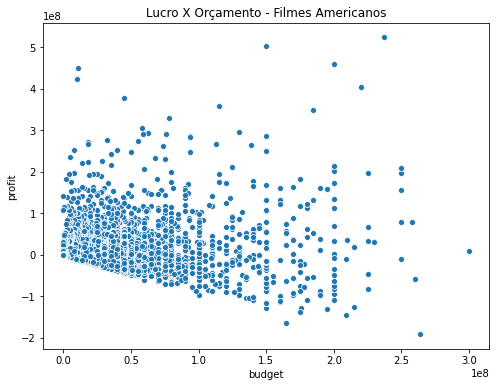

In [ ]:
imdb_usa['profit'] = imdb_usa['gross'] - imdb_usa['budget']

budget_gross_usa = imdb_usa.query('budget > 0 | gross > 0')[['budget', 'profit']].dropna() #pegando apenas as colunas de orçamento e faturamento e tirando os valores na
                                                                                #e pegando os filmes que possuem budget>0 ou gross>0
plt.figure(figsize=(8,6))
sns.scatterplot(x='budget', y='profit', data=budget_gross_usa).set_title('Lucro X Orçamento - Filmes Americanos')

In [ ]:
#Extraindo apenas os filmes americanos que são coloridos e plotando a relação entre o orçamento e o lucro para esses filmes
imdb_usa_color = imdb.query("country == 'USA' and color=='Color'")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Lucro X Orçamento - Filmes Americanos Coloridos')

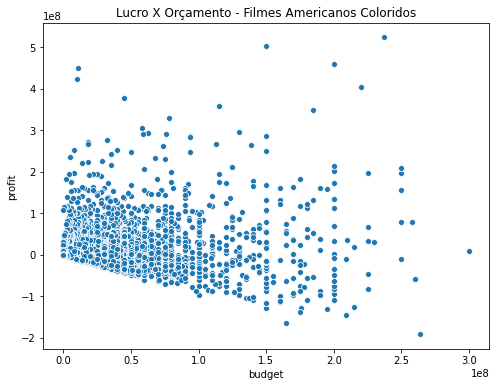

In [ ]:
imdb_usa_color['profit'] = imdb_usa_color['gross'] - imdb_usa_color['budget']

budget_gross_usa_color = imdb_usa_color.query('budget > 0 | gross > 0')[['budget', 'profit']].dropna() #pegando apenas as colunas de orçamento e faturamento e tirando os valores na
                                                                                #e pegando os filmes que possuem budget>0 ou gross>0
plt.figure(figsize=(8,6))
sns.scatterplot(x='budget', y='profit', data=budget_gross_usa_color).set_title('Lucro X Orçamento - Filmes Americanos Coloridos')

In [ ]:
#Extraindo apenas os filmes americanos que são em preto e branco e plotando a relação entre o orçamento e o lucro para esse filmes
imdb_usa_bw = imdb.query("country == 'USA' and color==' Black and White'")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Lucro X Orçamento - Filmes Americanos em Preto e Branco')

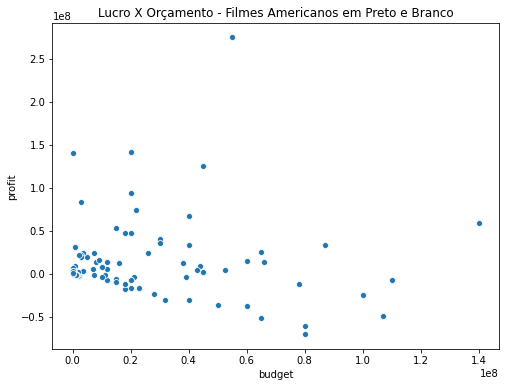

In [ ]:
imdb_usa_bw['profit'] = imdb_usa_bw['gross'] - imdb_usa_bw['budget']

budget_gross_usa_bw = imdb_usa_bw.query('budget > 0 | gross > 0')[['budget', 'profit']].dropna() #pegando apenas as colunas de orçamento e faturamento e tirando os valores na
                                                                                #e pegando os filmes que possuem budget>0 ou gross>0
plt.figure(figsize=(8,6))
sns.scatterplot(x='budget', y='profit', data=budget_gross_usa_bw).set_title('Lucro X Orçamento - Filmes Americanos em Preto e Branco')

Note, então, que não há uma relação entre o filme ser colorido ou preto e branco e ter mais lucro, de acordo com o que vemos nos gráficos

Quanto maior a quantidade de filmes de um diretor, mais lucro ele possui?

In [ ]:
movie_director = imdb_usa['director_name'].value_counts()
movie_director.head()

Steven Spielberg    24
Clint Eastwood      20
Martin Scorsese     20
Woody Allen         18
Spike Lee           16
Name: director_name, dtype: int64

In [ ]:
#como ocorre overlap das duas colunas director name, transformamos a do imdb_usa em index e, assim, juntamos o dataframe com a series
gross_director = imdb_usa[['director_name', 'gross']].set_index('director_name').join(movie_director, on='director_name', how='left') 
gross_director = gross_director.rename(columns={'director_name': 'movie_quantity'}) #mudando o nome da coluna director_name
gross_director = gross_director.reset_index() #resetando o index para que ele volte a ser uma coluna
gross_director.head()

,director_name,gross,movie_quantity
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


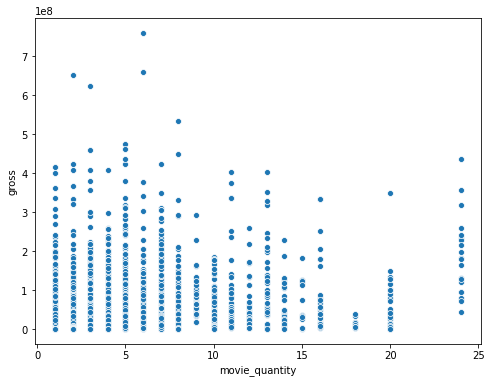

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=gross_director, x='movie_quantity', y='gross')

Qual a correlação entre as variáveis gross, budget, profit e title_year?

<Figure size 576x432 with 0 Axes>

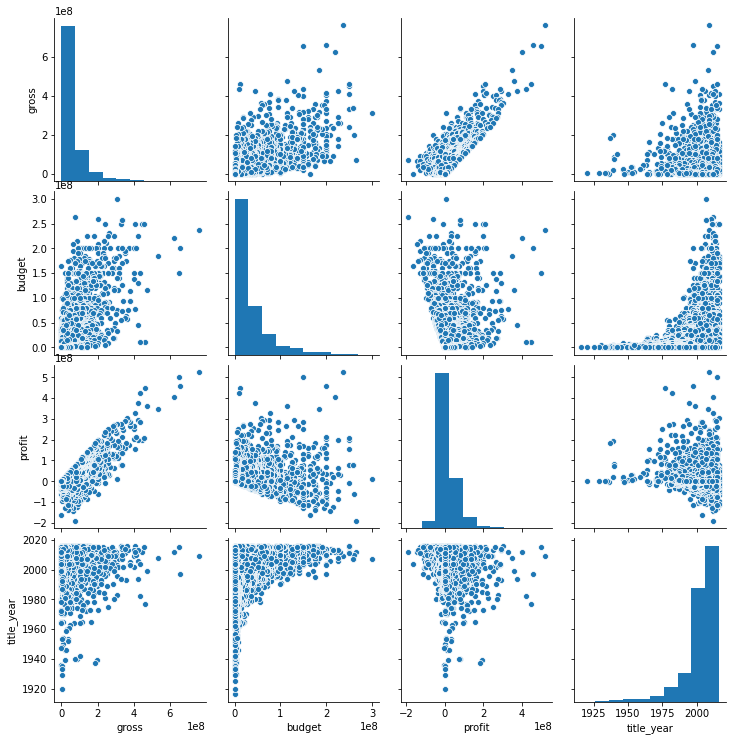

In [ ]:
plt.figure(figsize=(8,6))
sns.pairplot(data=imdb_usa[['gross', 'budget', 'profit', 'title_year']]) #dá todos os plots

In [ ]:
imdb_usa[['gross', 'budget', 'profit', 'title_year']].corr()

,gross,budget,profit,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
profit,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000


##Desafios - Aula 3

Desafio 1: Boxplot da média do imdb_score de filmes coloridos e em preto e 
branco

In [ ]:
color_or_blackwhite = imdb.query("color in [' Black and White','Color']")
color_or_blackwhite['color_c_or_bw'] = (color_or_blackwhite['color'] == 'Color')*1 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


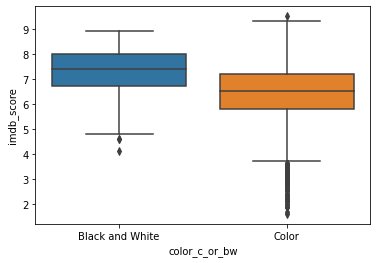

In [ ]:
ax = sns.boxplot(x='color_c_or_bw', y="imdb_score", data=color_or_blackwhite) \
                  .set_xticklabels(labels=['Black and White', 'Color'])

Desafio 2: Qual o filme que gastou muito e que teve prejuízo, que tá próximo do 2.5 de budget aí no gráfico que possui lucro?

In [ ]:
#usando filmes americanos para garantir mesma moeda (dólar)
imdb_usa_query=imdb_usa.query('budget > 0 | gross > 0').dropna(subset=['budget','gross'])
imdb_usa_query.shape

(3047, 29)

Text(0.5, 1.0, 'Lucro X Orçamento - Filmes Americanos')

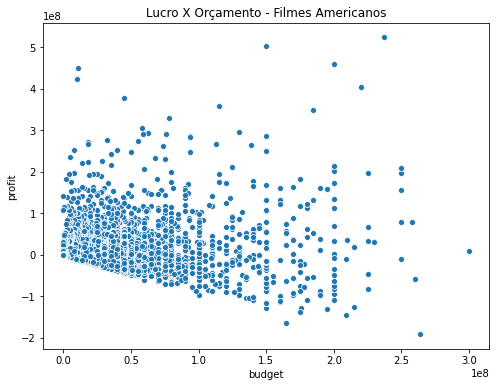

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='budget', y='profit', data=imdb_usa_query).set_title('Lucro X Orçamento - Filmes Americanos')

In [ ]:
imdb_usa_query = imdb_usa_query.query('250000000.0 < budget < 280000000 & -200000000 < profit < -100000000').loc[:,['movie_title','budget','profit']]
imdb_usa_query

,movie_title,budget,profit
5,John Carter,263700000.0,-190641321.0


Desafio 3: Filmes mais recentes tiveram maior prejuízo?

In [ ]:
imdb_usa_year = imdb_usa.loc[:,['title_year', 'profit']].dropna(subset=['profit'])
imdb_usa_year = imdb_usa_year.groupby('title_year')['profit'].mean()

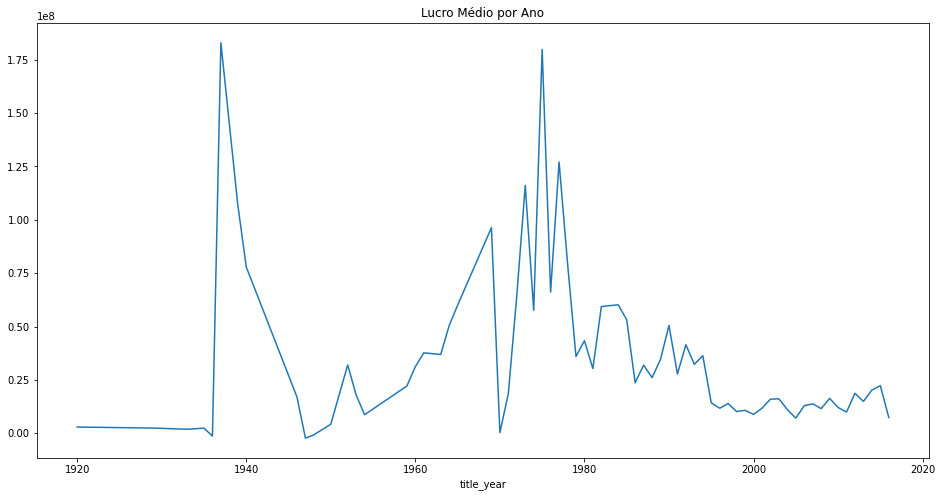

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Lucro Médio por Ano")
imdb_usa_year.plot()

Podemos concluir que, em média, filmes mais recentes tiveram menos lucros que filmes mais antigos. Isso pode ser resultado de vários fatores, como por exemplo: 

*   Os filmes das décadas de 30/40 e 80 são filmes muitíssimos cultuados e que tiveram bastante tempo para gerar lucros (contando desde que foram lançados até os dias atuais).
*   Hoje em dia, há muito mais filmes lançados, portanto há uma margem para que tenhamos vários filmes que se deram bem e outros nem tanto. Assim, dependendo do resultado do ano, a média de lucro pode ser mais baixa (do que seria se tivessem bons filmes em menor quantidade).



Desafio 4: Baseado no gráfico do Desafio 3, quais são esses filmes pré 2a Guerra que tiveram bastante lucro?

In [ ]:
imdb_usa_year_profit = imdb_usa.loc[:,['movie_title', 'title_year', 'profit']].query('1935 < title_year < 1940 & profit > 0')
imdb_usa_year_profit

,movie_title,title_year,profit
3970,Gone with the Wind,1939.0,194678278.0
4157,The Wizard of Oz,1939.0,19402612.0
4449,Snow White and the Seven Dwarfs,1937.0,182925485.0


Os filmes pré Segunda Guerra Mundial que tiveram lucros altíssimos (veja o gráfico, eles foram lançados entre 1935 e 1940, aproximadamente) foram:
*   Gone with the Wind (E o Vento Levou)
*   The Wizard of Oz (O Mágico de Oz)
*   Snow White and the Seven Dwarfs (Branca de Neve e os Sete Anões)





Desafio 5: Confirmar que os filmes que estão entre 15 e 20 no movie_quantity (Filmes irmãos) são do Woody Allen.

In [ ]:
gross_director.head()

,director_name,gross,movie_quantity
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


In [ ]:
gross_director.loc[:,['director_name','movie_quantity']].query('17 < movie_quantity < 20').head()

,director_name,movie_quantity
1538,Woody Allen,18.0
1737,Woody Allen,18.0
1861,Woody Allen,18.0
1869,Woody Allen,18.0
1872,Woody Allen,18.0


De fato, são do Woody Allen!

Desafio 6: Calcular a correlação entre as variáveis 'gross', 'budget', 'profit', 'title_year' somente para filmes depois de 2000 (jogar fora os de antes de 2000).

In [ ]:
imdb_usa_2000 = imdb_usa.query("title_year >= 2000.0")
imdb_usa_2000.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0


In [ ]:
imdb_usa_2000[['gross', 'budget', 'profit', 'title_year']].corr()

,gross,budget,profit,title_year
gross,1.000000,0.709233,0.770642,0.105342
budget,0.709233,1.000000,0.097307,0.058550
profit,0.770642,0.097307,1.000000,0.035039
title_year,0.105342,0.058550,0.035039,1.000000


<Figure size 576x432 with 0 Axes>

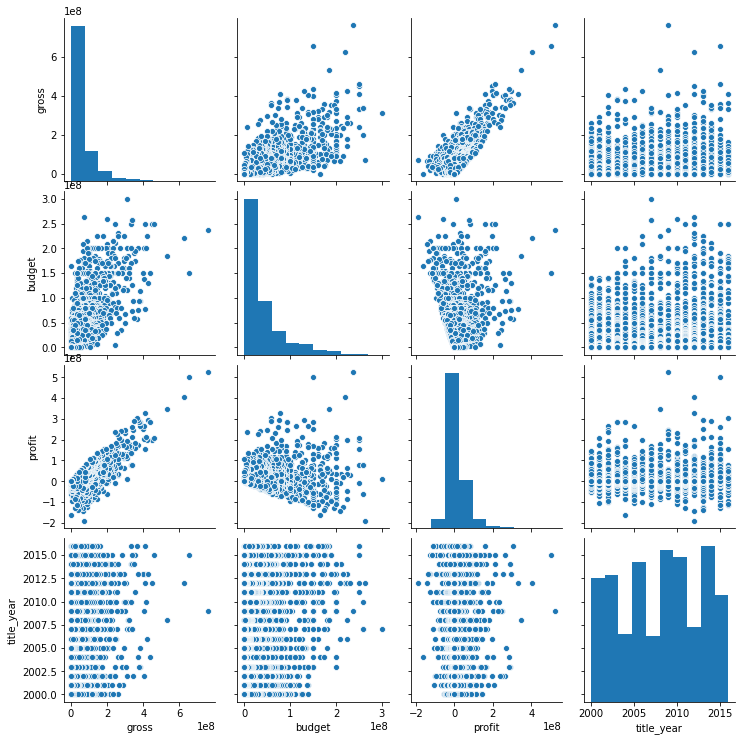

In [ ]:
plt.figure(figsize=(8,6))
sns.pairplot(data=imdb_usa_2000[['gross', 'budget', 'profit', 'title_year']])

Desafio 7:  Interpretar essa correlação.

Neste caso, estamos vendo uma pequena fatia dos dados: estamos considerando apenas filmes de 2000 para frente. Isso implica no fato de não conseguirmos ver que 'filmes mais novos, em média, gastam mais para ser feitos (possuem um budget maior)' ou que 'filmes mais novos, em média, lucram menos'.

Porém, ainda conseguimos ver a forte relação entre faturamento e lucro (gross e profit): quanto maior o faturamento, maior o lucro, em média.

Desafio 8: Tentar encontrar uma reta, com o excel ou com o python, no gráfico que parece se aproximar de uma reta (por exemplo, gross/profit).

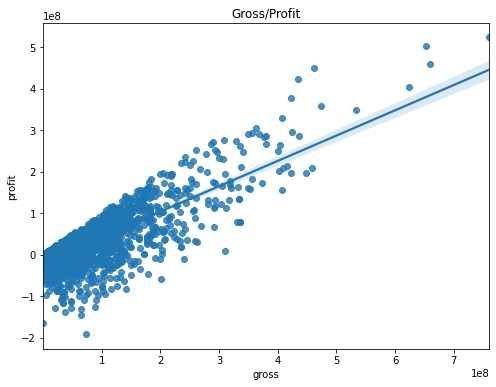

In [ ]:
#De forma a encontrar uma reta que mais se aproxima/ajusta dos/aos pontos do gráfico que 
#nos mostra a relação entre gross e profit, podemos usar a função sns.regplot() - traça os dados e um modelo de regressão linear
plt.figure(figsize=(8,6))
plt.title('Gross/Profit')
sns.regplot(x='gross', y='profit', data=imdb_usa)

Desafio 9: Utilizar também as notas nas correlações, nos gráficos. Número de avaliações por ano pode ser também uma feature.

In [ ]:
imdb_usa.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0


In [ ]:
imdb_usa[['gross', 'budget', 'profit', 'title_year', 'imdb_score']].corr()

,gross,budget,profit,title_year,imdb_score
gross,1.000000,0.645673,0.797037,0.034827,0.258948
budget,0.645673,1.000000,0.053455,0.229453,0.078936
profit,0.797037,0.053455,1.000000,-0.123035,0.294858
title_year,0.034827,0.229453,-0.123035,1.000000,-0.227569
imdb_score,0.258948,0.078936,0.294858,-0.227569,1.000000


<Figure size 576x432 with 0 Axes>

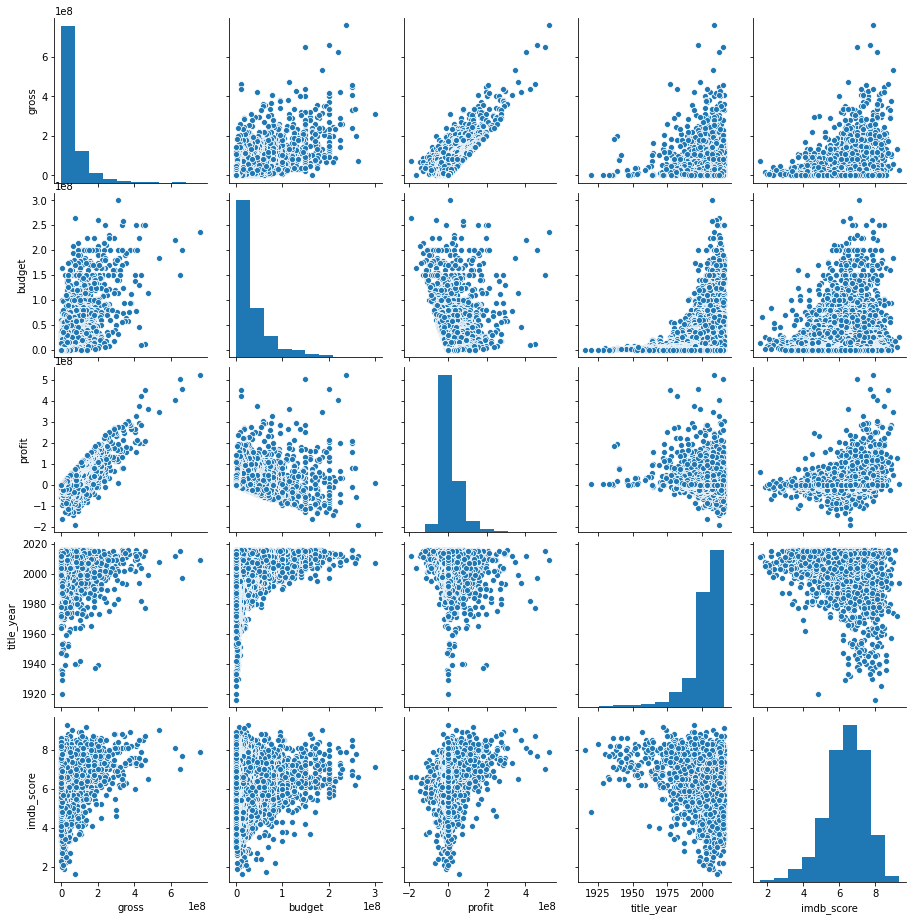

In [ ]:
plt.figure(figsize=(8,6))
sns.pairplot(data=imdb_usa[['gross', 'budget', 'profit', 'title_year', 'imdb_score']])

Falando sobre imdb_score em relação as outras features, uma das mais expressivas é a relação entre imdb_score e title_year. Podemos ver que, quanto mais recente o ano, mais "diversidade" de notas se tem, ou seja, mais avaliado ele foi, porém quanto mais velho o ano, apesar de ter menos avaliações, as notas são melhores!

Podemos ver também a relação entre faturamento (gross) e o imdb_score. Note que, quanto maior o faturamento, o imdb_score tende a ser maior também. Isso também pode ser visto na relação entre despesa (budget) e imdb_score. (Salvo algumas exceções, mas em média isso pode ser visto). 